In [91]:
from math import sqrt
import numpy as np
import sympy as sm

import matplotlib.pyplot as plt
import pandas as pd
#from scipy.optimize import curve_fit
from lab_processing import print_errors, create_plot

In [92]:
x, y = sm.symbols('x y')

In [107]:
#y' = f
#f = (y**2 - 3*x*y - 2*x**2)/(x**2 - x*y)
#f = 3*x * y + x*y**2
f = x**3 + (2*x**2 + 1)*y + x*y**2
#x ∈ (x_0; x_N)
x_0 = 1
x_N = 2
#accuracy
epsln = 10**(-4)
#y(x_0) = ...
y_0 = -3
#initial number of grid nodes
N_nodes = 10
#initial grid step
h = (x_N - x_0)/N_nodes

In [108]:
f

x**3 + x*y**2 + y*(2*x**2 + 1)

In [109]:
#x_grid, h = np.linspace(x_0, x_N, N_nodes, retstep = True)
x_grid = np.arange(x_0, x_N + 0.001, h)
y_grid = np.empty(x_grid.size)
y_grid[0] = y_0

In [110]:
print(x_grid, h)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ] 0.1


In [111]:
for i in range(1, x_grid.size):
    y_grid[i] = y_grid[i-1] + \
                h*f.subs([(x, x_grid[i-1] + h/2), \
                        (y, y_grid[i-1] + h/2*f.subs([(x, x_grid[i-1]), \
                                                      (y, y_grid[i-1])]) \
                        )])

In [112]:
print(y_grid)

[-3.         -2.91595    -2.85965465 -2.82842366 -2.8192955  -2.82936721
 -2.85594281 -2.89658454 -2.94911693 -3.0116114  -3.08236615]


In [113]:
#x_grid_2h, h_2 = np.linspace(x_0, x_N, 2*N_nodes + 1, retstep = True)
h_2 = 2*h
x_grid_2h = np.arange(x_0, x_N + 0.001, h_2)
y_grid_2h = np.empty(x_grid_2h.size)
y_grid_2h[0] = y_0
for i in range(1, x_grid_2h.size):
    y_grid_2h[i] = y_grid_2h[i-1] + \
                h_2*f.subs([(x, x_grid_2h[i-1] + h_2/2), \
                        (y, y_grid_2h[i-1] + h_2/2*f.subs([(x, x_grid_2h[i-1]), \
                                                      (y, y_grid_2h[i-1])]) \
                        )])

In [114]:
print(y_grid_2h)

[-3.         -2.8672     -2.83027557 -2.86745245 -2.95959424 -3.09112924]


In [115]:
dataset = pd.DataFrame({'x':x_grid,'y':y_grid})
dataset_2 = pd.DataFrame({'x_2':x_grid_2h,'y_2':y_grid_2h})
bb = dataset_2.T
gg = dataset.T
bb

,0,1,2,3,4,5
x_2,1.0,1.2000,1.400000,1.600000,1.800000,2.000000
y_2,-3.0,-2.8672,-2.830276,-2.867452,-2.959594,-3.091129


In [116]:
gg

,0,1,2,3,4,5,6,7,8,9,10
x,1.0,1.10000,1.200000,1.300000,1.400000,1.500000,1.600000,1.700000,1.800000,1.900000,2.000000
y,-3.0,-2.91595,-2.859655,-2.828424,-2.819296,-2.829367,-2.855943,-2.896585,-2.949117,-3.011611,-3.082366


In [117]:
diff_y_h_y_2h = np.empty(y_grid_2h.size)

In [118]:
for i in range(0, y_grid_2h.size):
    diff_y_h_y_2h[i] = abs(y_grid_2h[i] - y_grid[2*i])

In [119]:
print('Accuracy: ', diff_y_h_y_2h.max() / (2**2 - 1), '< 10**(-4)')

Accuracy:  0.0038365458491827673 < 10**(-4)


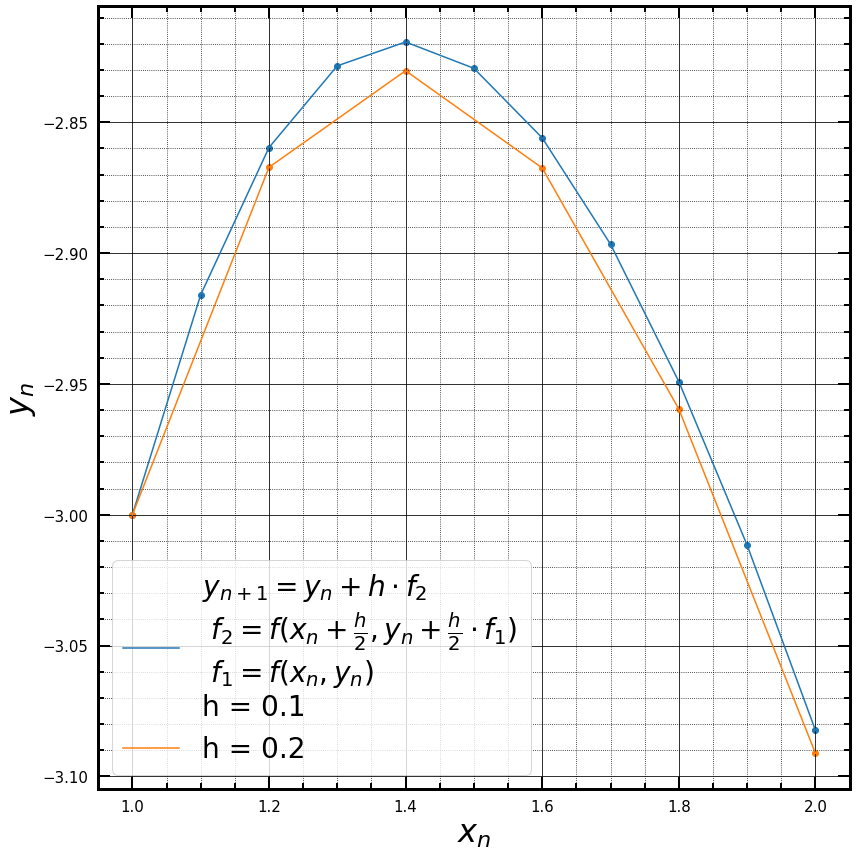

In [120]:
fig, ax = create_plot(10,10)
ax.plot(x_grid, y_grid, label='$ y_{n+1} = y_n + h \cdot f_2$ \n \
$ f_2 = f(x_n + \\frac{h}{2}, y_n + \\frac{h}{2} \cdot f_1)$ \n \
$ f_1 = f(x_n, y_n)$ \n' + f'h = {h}')
ax.scatter(x_grid, y_grid)
ax.plot(x_grid_2h, y_grid_2h, label=f'h = {h_2}')
ax.scatter(x_grid_2h, y_grid_2h)


ax.set_xlabel('$x_n$', fontsize=32)
ax.set_ylabel('$y_n$', fontsize=32)
ax.legend(fontsize=28)
fig.set_figwidth(12)
fig.set_figheight(12)
fig.tight_layout()
fig.savefig(f'graphs/plot_{2}.pdf')